# Question 3: Weather Data Analysis

We convert weather data (temperature measured on certain days) to tidy format, plot some simple graphs, and discuss monthly patterns.

## 1. Load Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 2. Load Data

In [16]:
# Load weather data
df = pd.read_csv('Data/Weather Data/weather.csv')

print("\nFirst few rows:")
print(df.head(10))


First few rows:
  Country  year  month element  d1    d2    d3  d4    d5  d6  ...  d22   d23  \
0   India  2015      1    tmax NaN   NaN   NaN NaN   NaN NaN  ...  NaN   NaN   
1   India  2015      1    tmin NaN   NaN   NaN NaN   NaN NaN  ...  NaN   NaN   
2   India  2015      2    tmax NaN  27.3  24.1 NaN   NaN NaN  ...  NaN  29.9   
3   India  2015      2    tmin NaN  14.4  14.4 NaN   NaN NaN  ...  NaN  10.7   
4   India  2015      3    tmax NaN   NaN   NaN NaN  32.1 NaN  ...  NaN   NaN   
5   India  2015      3    tmin NaN   NaN   NaN NaN  14.2 NaN  ...  NaN   NaN   
6   India  2015      4    tmax NaN   NaN   NaN NaN   NaN NaN  ...  NaN   NaN   
7   India  2015      4    tmin NaN   NaN   NaN NaN   NaN NaN  ...  NaN   NaN   
8   India  2015      5    tmax NaN   NaN   NaN NaN   NaN NaN  ...  NaN   NaN   
9   India  2015      5    tmin NaN   NaN   NaN NaN   NaN NaN  ...  NaN   NaN   

   d24  d25  d26   d27  d28  d29   d30  d31  
0  NaN  NaN  NaN   NaN  NaN  NaN  27.8  NaN  
1  NaN  Na

## 3. Convert to Tidy Format

**Tidy Data Transformation**:
- **Original**: Wide format with columns d1-d31 for each day of the month
- **Target**: Long format with one row per observation (country-year-month-day-element)
- **Variables**: Country, year, month, day, element (tmax/tmin), temperature
- **Values**: Temperature readings in degrees Celsius

In [13]:
# Melt the dataframe to convert day columns (d1-d31) to rows
day_cols = [f'd{i}' for i in range(1, 32)]

df_tidy = df.melt(
    id_vars=['Country', 'year', 'month', 'element'],
    value_vars=day_cols,
    var_name='day',
    value_name='temperature'
)

# Extract day number from 'd1', 'd2', etc.
df_tidy['day'] = df_tidy['day'].str.extract(r'(\d+)').astype(int)

# Remove rows with missing temperature values (NA)
df_tidy = df_tidy.dropna(subset=['temperature'])

# Create a proper date column
df_tidy['date'] = pd.to_datetime(
    df_tidy['year'].astype(str) + '-' + 
    df_tidy['month'].astype(str) + '-' + 
    df_tidy['day'].astype(str),
    errors='coerce'
)

# Remove invalid dates
df_tidy = df_tidy.dropna(subset=['date'])
print(df_tidy.head(10))

   Country  year  month element  day  temperature       date
20   India  2015     12    tmax    1         29.9 2015-12-01
21   India  2015     12    tmin    1         13.8 2015-12-01
24   India  2015      2    tmax    2         27.3 2015-02-02
25   India  2015      2    tmin    2         14.4 2015-02-02
40   India  2015     11    tmax    2         31.3 2015-11-02
41   India  2015     11    tmin    2         16.3 2015-11-02
46   India  2015      2    tmax    3         24.1 2015-02-03
47   India  2015      2    tmin    3         14.4 2015-02-03
56   India  2015      7    tmax    3         28.6 2015-07-03
57   India  2015      7    tmin    3         17.5 2015-07-03


## 4. Pivot to Separate tmax and tmin

**Assumption**: It's more useful to have tmax and tmin as separate columns for analysis

In [ ]:
# Pivot to have tmax and tmin as separate columns
df_final = df_tidy.pivot_table(
    index=['Country', 'year', 'month', 'day', 'date'],
    columns='element',
    values='temperature'
).reset_index()

# Rename columns
df_final.columns.name = None

print("\nFinal format:")
print(df_final.head(10))


Final format:
  Country  year  month  day       date  tmax  tmin
0   India  2015      1   30 2015-01-30  27.8  14.5
1   India  2015      2    2 2015-02-02  27.3  14.4
2   India  2015      2    3 2015-02-03  24.1  14.4
3   India  2015      2   11 2015-02-11  29.7  13.4
4   India  2015      2   23 2015-02-23  29.9  10.7
5   India  2015      3    5 2015-03-05  32.1  14.2
6   India  2015      3   10 2015-03-10  34.5  16.8
7   India  2015      3   16 2015-03-16  31.1  17.6
8   India  2015      4   27 2015-04-27  36.3  16.7
9   India  2015      5   27 2015-05-27  33.2  18.2


## 5. Visualize Temperature Patterns

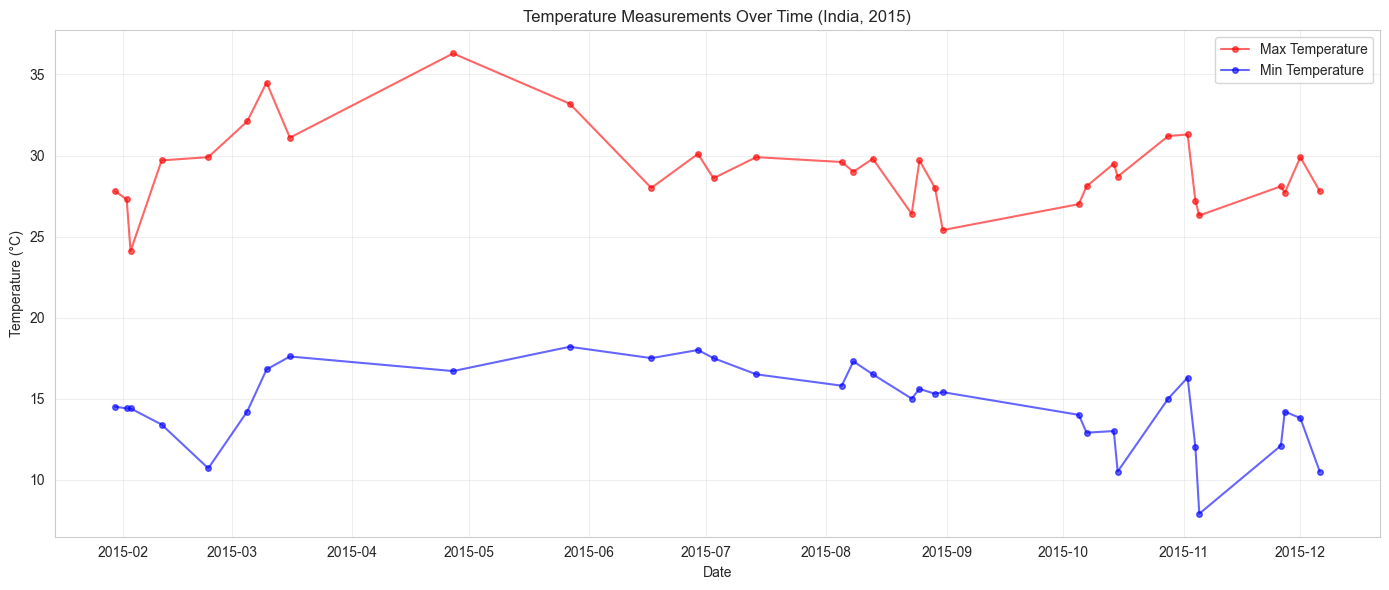

In [5]:
# Plot temperature over time
plt.figure(figsize=(14, 6))
plt.plot(df_final['date'], df_final['tmax'], 'ro-', alpha=0.6, label='Max Temperature', markersize=4)
plt.plot(df_final['date'], df_final['tmin'], 'bo-', alpha=0.6, label='Min Temperature', markersize=4)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Measurements Over Time (India, 2015)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Monthly Temperature Patterns

In [6]:
# Calculate monthly statistics
monthly_stats = df_final.groupby('month').agg({
    'tmax': ['mean', 'min', 'max', 'count'],
    'tmin': ['mean', 'min', 'max']
}).round(2)

print("Monthly Temperature Statistics:")
print(monthly_stats)

Monthly Temperature Statistics:
        tmax                     tmin            
        mean   min   max count   mean   min   max
month                                            
1      27.80  27.8  27.8     1  14.50  14.5  14.5
2      27.75  24.1  29.9     4  13.22  10.7  14.4
3      32.57  31.1  34.5     3  16.20  14.2  17.6
4      36.30  36.3  36.3     1  16.70  16.7  16.7
5      33.20  33.2  33.2     1  18.20  18.2  18.2
6      29.05  28.0  30.1     2  17.75  17.5  18.0
7      29.25  28.6  29.9     2  17.00  16.5  17.5
8      28.27  25.4  29.8     7  15.84  15.0  17.3
10     28.90  27.0  31.2     5  13.08  10.5  15.0
11     28.12  26.3  31.3     5  12.50   7.9  16.3
12     28.85  27.8  29.9     2  12.15  10.5  13.8


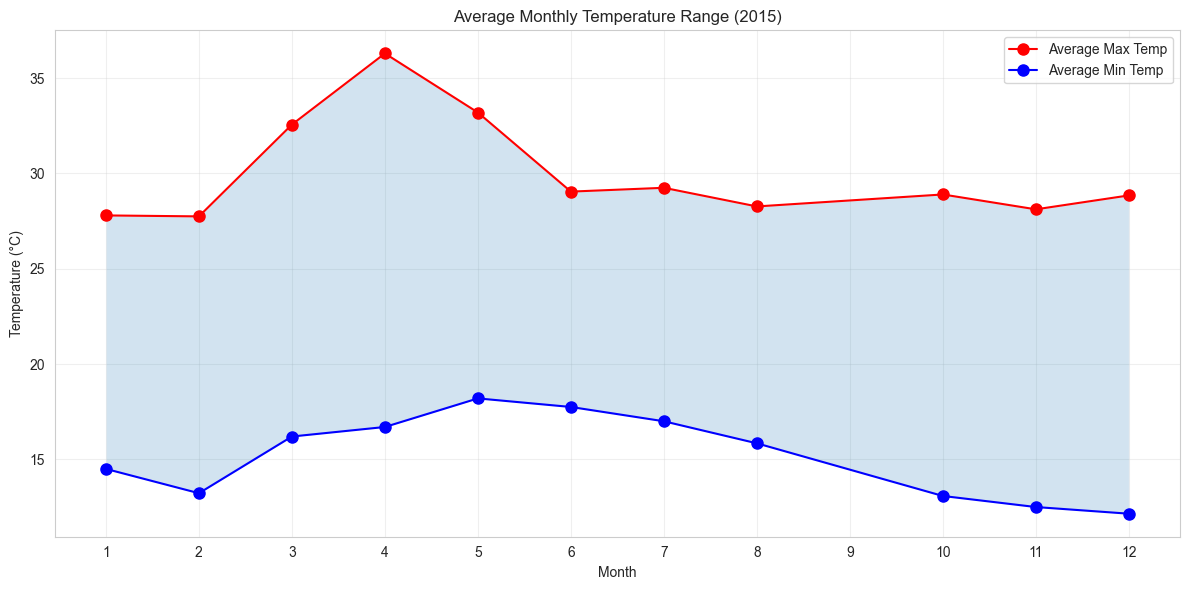

In [7]:
# Plot monthly average temperatures
monthly_avg = df_final.groupby('month')[['tmax', 'tmin']].mean()

plt.figure(figsize=(12, 6))
months = monthly_avg.index
plt.plot(months, monthly_avg['tmax'], 'ro-', label='Average Max Temp', markersize=8)
plt.plot(months, monthly_avg['tmin'], 'bo-', label='Average Min Temp', markersize=8)
plt.fill_between(months, monthly_avg['tmin'], monthly_avg['tmax'], alpha=0.2)
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Average Monthly Temperature Range (2015)')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Temperature Distribution by Month

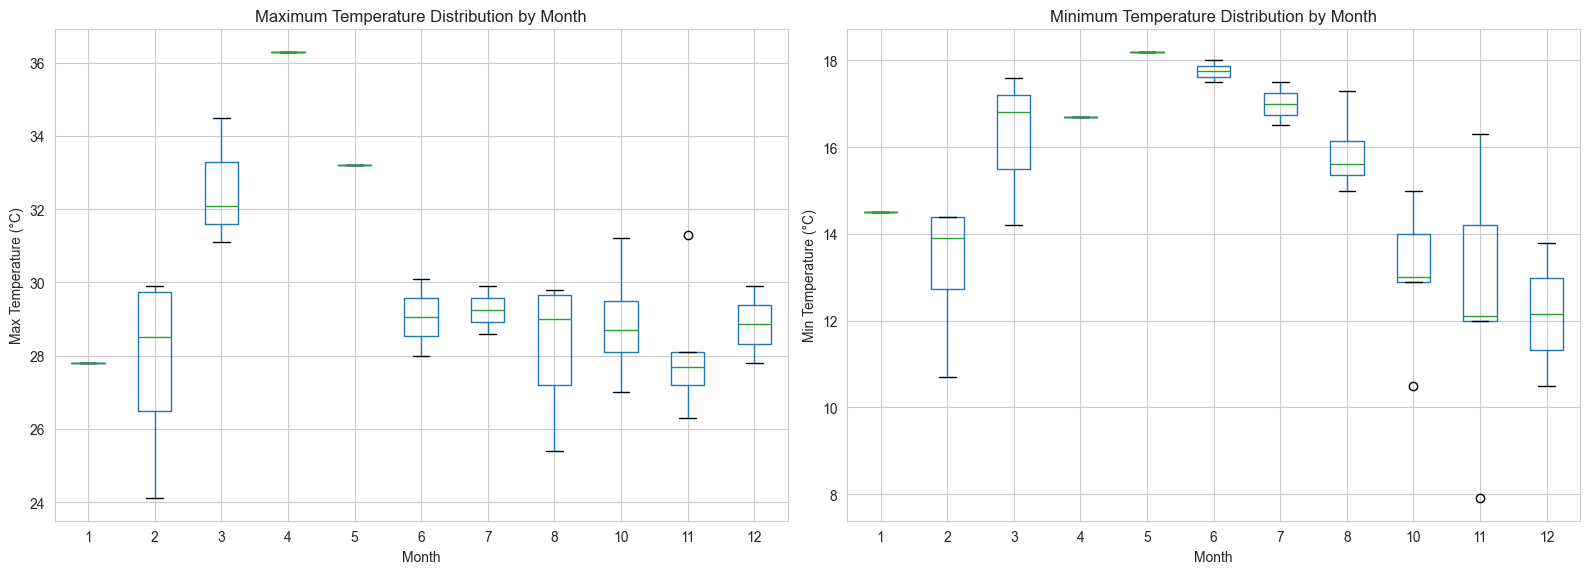

In [8]:
# Box plot for temperature distribution by month
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Max temperature
df_final.boxplot(column='tmax', by='month', ax=axes[0])
axes[0].set_title('Maximum Temperature Distribution by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Max Temperature (°C)')
axes[0].get_figure().suptitle('')  # Remove default title

# Min temperature
df_final.boxplot(column='tmin', by='month', ax=axes[1])
axes[1].set_title('Minimum Temperature Distribution by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Min Temperature (°C)')
axes[1].get_figure().suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

## 8. Data Coverage Analysis

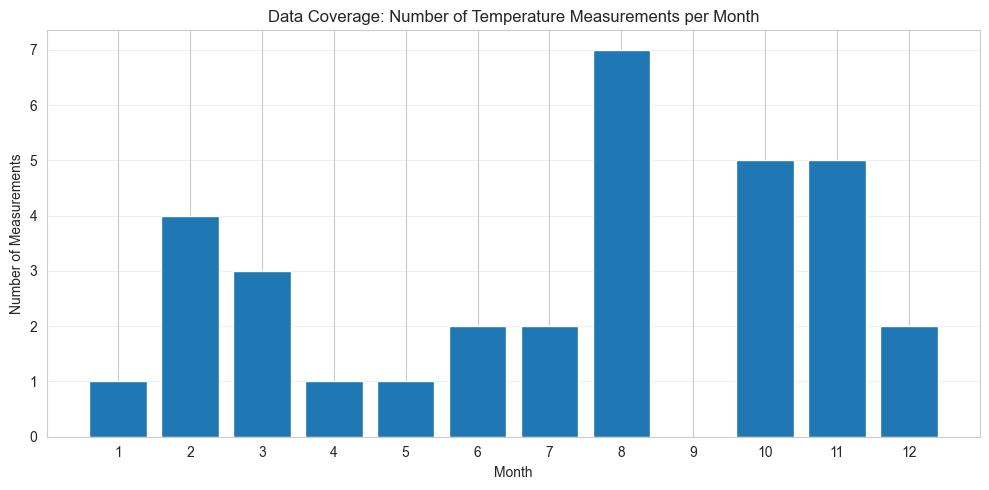


Measurements per month:
    month  measurements
0       1             1
1       2             4
2       3             3
3       4             1
4       5             1
5       6             2
6       7             2
7       8             7
8      10             5
9      11             5
10     12             2


In [ ]:
coverage = df_final.groupby('month').size().reset_index(name='measurements')

plt.figure(figsize=(10, 5))
plt.bar(coverage['month'], coverage['measurements'])
plt.xlabel('Month')
plt.ylabel('Number of Measurements')
plt.title('Data Coverage: Number of Temperature Measurements per Month')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\nMeasurements per month:")
print(coverage)